In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('transacoes.xlsx')
df.head(10)

,Tipo,Descrição,Categoria,Valor,Forma de Transação,Ano,Mês,Dia,Hora
0,Entrada,Mauro,Outros,60.00,Pix,2024,9,1,NaN
1,Saída,Valeska,Outros,30.00,Pix,2024,9,1,NaN
2,Saída,Charles,Outros,6.50,Cartão,2024,9,3,NaN
3,Saída,Paula,Outros,17.32,Pix,2024,9,3,NaN
4,Saída,Padaria,Alimento,0.90,Fiado,2024,9,3,NaN
5,Entrada,Ajuda Custo,Salário,419.75,Pix,2024,9,4,NaN
6,Saída,Confiança,Alimento,14.42,Outro,2024,9,4,NaN
7,Saída,Uber,Transporte,6.87,Pix,2024,9,4,NaN
8,Saída,Fabiola Maria,Outros,90.00,Dinheiro,2024,9,4,NaN
9,Saída,Charles,Outros,20.00,Pix,2024,9,4,NaN


In [3]:
# removendo a coluna hora que inicialmente não tem valores
df = df.drop('Hora', axis=1)
df

,Tipo,Descrição,Categoria,Valor,Forma de Transação,Ano,Mês,Dia
0,Entrada,Mauro,Outros,60.00,Pix,2024,9,1
1,Saída,Valeska,Outros,30.00,Pix,2024,9,1
2,Saída,Charles,Outros,6.50,Cartão,2024,9,3
3,Saída,Paula,Outros,17.32,Pix,2024,9,3
4,Saída,Padaria,Alimento,0.90,Fiado,2024,9,3
...,...,...,...,...,...,...,...,...
201,Saída,Ifood,Alimento,10.00,Pix,2024,10,13
202,Saída,Padaria,Alimento,2.70,Pix,2024,10,13
203,Saída,Confiança,Alimento,13.18,Pix,2024,10,14
204,Entrada,Leandro,Outros,90.00,Pix,2024,10,14


In [8]:
df_forma = df.groupby('Forma de Transação', as_index=False)['Valor'].sum()
df_forma

,Forma de Transação,Valor
0,Cartão,227.65
1,Dinheiro,852.58
2,Fiado,1729.53
3,Outro,758.60
4,Pix,7067.99


In [ ]:
total_forma = df_forma['Valor'].sum()

np.float64(10636.35)

In [ ]:
df_forma['porc'] = [round((valor /total_forma) * 100, 2) for valor in df_forma['Valor']]
df_forma

,Forma de Transação,Valor,porc
0,Cartão,227.65,2.14
1,Dinheiro,852.58,8.02
2,Fiado,1729.53,16.26
3,Outro,758.60,7.13
4,Pix,7067.99,66.45


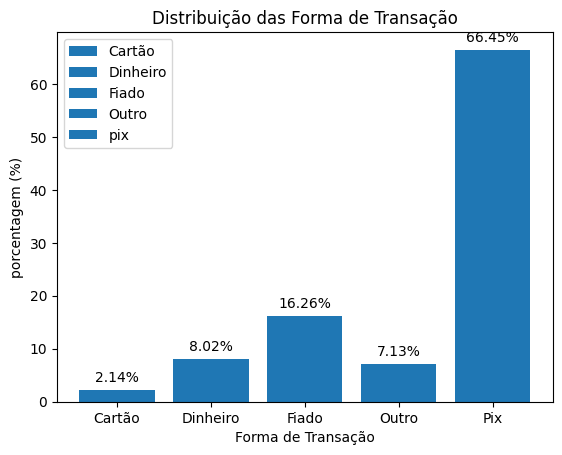

In [ ]:
# Criando gráfocos de barras
plt.bar(df_forma['Forma de Transação'], df_forma['porc'], label=[f"{valor} : R$ {valor}" for tras, valor in zip(df_forma['Forma de Transação'], df_forma['Valor'])])

# Exibindo a legenda no gráfico
plt.legend(['Cartão', 'Dinheiro', 'Fiado', 'Outro', 'pix'])
# Adicionando título e rótulos aos eixos
plt.title("Distribuição das Forma de Transação")
plt.xlabel("Forma de Transação")
plt.ylabel("porcentagem (%)")

# Adicionando os valores no topo de cada barra
for index, value in enumerate(df_forma["porc"]):
    plt.text(index, value + 1, f"{value}%",ha='center', va='bottom')

# Exibindo o gráfico
plt.show()
